In [1]:
from graphviz import Digraph

In [2]:
from src.jiggy.runner import SequentialRunner
x = SequentialRunner('examples/inputs/new_ext.yml')

In [3]:
gf = x.dag.associate()
gf

['print-somethin-3',
 'print-somethin-2',
 'get-current-date',
 'get-weekday',
 'print-somethin',
 'get-first-letter']

In [4]:
xgraph = x.dag.graph

In [5]:
xgraph

OrderedDict([('print-somethin', set()),
             ('print-somethin-2', {'print-somethin-3'}),
             ('print-somethin-3', set()),
             ('get-current-date', {'print-somethin-2'}),
             ('get-first-letter', {'get-weekday', 'print-somethin'}),
             ('get-weekday', {'get-current-date'})])

In [6]:
dot = Digraph()
for k, v in xgraph.items():
    dot.node(k)
    for dep in v:
        dot.edge(dep, k)

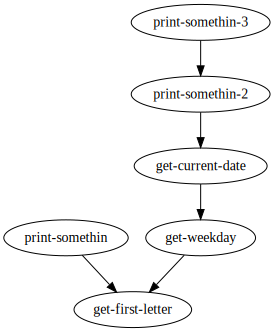

In [7]:
dot

In [8]:
import plotly.graph_objects as go
import networkx as nx

In [9]:
G = nx.DiGraph()
for k, v in xgraph.items():
    G.add_node(k)
    for dep in v:
        G.add_edge(dep, k)

In [10]:
nx.is_directed_acyclic_graph(G)

True

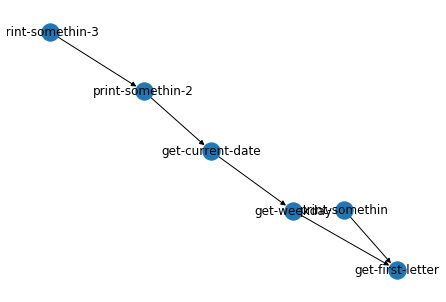

In [11]:
nx.draw_kamada_kawai(G, with_labels=True)